<a href="https://colab.research.google.com/github/eloiza-dias/artigo_imagens_microsc/blob/main/Correla%C3%A7%C3%A3o_3T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Organização das bibliotecas


In [ ]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg


In [ ]:
pip install util-gfsilveira

In [ ]:
#Biblioteca para carregar o modelo de regressão
from keras.models import load_model

### Modelo de regressão 3T3

In [ ]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens
modelo_3t3_menor_erro = load_model('/content/drive/MyDrive/1_Informações_scripts/model__3T3_regressao_menor_erro2022-1-26.h5')
modelo_3t3_menor_erro

### Dados necessários para obter X_test

In [ ]:
#Importando as imagens que foram salvas para treinar e testar o modelo
X_test_menor_erro = joblib.load('/content/drive/MyDrive/1_Informações_scripts/6_images_de_X_test_3T3_melhor_modelo.gz') #carregando arquivo
X_test_menor_erro.shape 

(250, 200, 200, 3)

In [ ]:
#Importando os rótulos de cada imagem - número de células para cada imagem
y_test_menor_erro = joblib.load('/content/drive/MyDrive/1_Informações_scripts/6_images_de_y_test_3T3_melhor_modelo.gz')
y_test_menor_erro.shape

(250,)

### Obtendo os valores de X_test para criar lista de dados previstos

In [ ]:
#Usando método predict para obter os valores dos dados previstos
dados_prev = modelo_3t3_menor_erro.predict(X_test_menor_erro)
lista_previsto_menor_erro = dados_prev.flatten().tolist() #Organizando os dados em formato de lista - tolist/e os dados de array em uma ÚNICA lista-flatten
#lista_previsto

### Valores dos dados observados

In [ ]:
lista_observado_menor_erro = list(y_test_menor_erro)
#lista_observado

In [ ]:
#importando pandas para organizar as listas
import pandas as pd
#importando a biblioteca para gerar a correlação
from scipy.stats.stats import pearsonr as stats


Criando a dataframe para organizar as listas dos valores

In [ ]:
df = pd.DataFrame(zip(lista_observado_menor_erro,lista_previsto_menor_erro), columns = ['Valores observados','Lista preditos'])
df.head()

,Valores observados,Lista preditos
0,574,159.961914
1,377,161.954590
2,532,160.170593
3,377,162.858185
4,765,158.307022


In [ ]:
#arredondando os dados previstos
dado_arre = round(df['Lista preditos'],2)
df['Valores preditos'] = dado_arre
# df

In [ ]:
#invertendo a ordem das colunas
df = df.reindex(columns=['Valores observados','Valores preditos','Lista preditos'])
df

,Valores observados,Valores preditos,Lista preditos
0,574,159.96,159.961914
1,377,161.95,161.954590
2,532,160.17,160.170593
3,377,162.86,162.858185
4,765,158.31,158.307022
...,...,...,...
245,56,148.48,148.483551
246,147,149.35,149.354721
247,610,157.99,157.989777
248,195,149.57,149.570404


In [ ]:
from scipy.stats.stats import spearmanr as spearman #importando a biblioteca para gráfico de correlação


<Figure size 1080x1080 with 0 Axes>

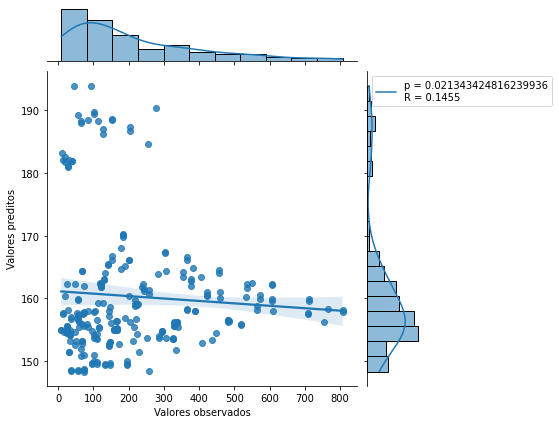

In [ ]:
col1_obt = 0
col2_prev = 1
pear_pos_menor_erro = spearman(df[df.columns[col1_obt]], df[df.columns[col2_prev]])
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(15,15))
sns.jointplot(
    x=df.columns[col1_obt],
    y=df.columns[col2_prev],
    kind='reg',
    data=df
)

# plt.legend(['p = ' + str(round(pear_pos[1], 5)) + '\nR = ' + str(round(pear_pos[0], 5))])
if pear_pos_menor_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_menor_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(pear_pos_menor_erro[1]) + '\nR = ' + str(round(pear_pos_menor_erro[0], 4))]) #calculando p e r

In [ ]:
pear_pos_menor_erro

(-0.07025451052267014, 0.2684572484058233)

In [ ]:
pear_pos_menor_erro[1]
if pear_pos_menor_erro[1] < 0.01:
  print('Sim, é inferior')
else:
  print('Não é inferior')

Não é inferior


### Modelo de regressão 3T3 - MAIOR ERRO

In [ ]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens
modelo_maior_erro = load_model('/content/drive/MyDrive/1_Informações_scripts/model__3T3_regressao_maior_erro2022-1-26.h5')
modelo_maior_erro

In [ ]:
X_test_maior_erro = joblib.load('/content/drive/MyDrive/1_Informações_scripts/6_images_de_X_test_3T3_pior_modelo.gz') #carregando arquivo
X_test_maior_erro.shape

(53, 200, 200, 3)

In [ ]:
y_test_maior_erro = joblib.load('/content/drive/MyDrive/1_Informações_scripts/6_images_de_y_test_3T3_pior_modelo.gz') #carregando arquivo
y_test_maior_erro.shape

(53,)

In [ ]:
lista_observado_maior_erro = list(y_test_maior_erro)
# lista_observado

In [ ]:
dados_prev = modelo_maior_erro.predict(X_test_maior_erro)
lista_previsto_maior_erro = dados_prev.flatten().tolist()
len(lista_previsto_maior_erro)

53

In [ ]:
df_maior_erro = pd.DataFrame(zip(lista_observado_maior_erro,lista_previsto_maior_erro), columns = ['Valores observados','Lista preditos'])
df_maior_erro.head()

,Valores observados,Lista preditos
0,97,250.278519
1,148,237.023056
2,709,246.052231
3,183,303.541809
4,327,239.354111


In [ ]:
teste = round(df_maior_erro['Lista preditos'],2)
df_maior_erro['Valores preditos'] = teste
# df

In [ ]:
df_maior_erro = df_maior_erro.reindex(columns=['Valores observados','Valores preditos','Lista preditos'])
df_maior_erro.head()

,Valores observados,Valores preditos,Lista preditos
0,97,250.28,250.278519
1,148,237.02,237.023056
2,709,246.05,246.052231
3,183,303.54,303.541809
4,327,239.35,239.354111


<Figure size 1080x1080 with 0 Axes>

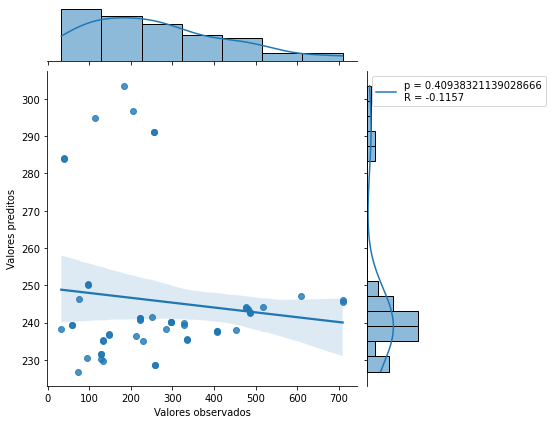

In [ ]:
col1_obt = 0
col2_prev = 1
pear_pos_maior_erro = stats(df_maior_erro[df_maior_erro.columns[col1_obt]], df_maior_erro[df_maior_erro.columns[col2_prev]])
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(15,15))
sns.jointplot(
    x=df_maior_erro.columns[col1_obt],
    y=df_maior_erro.columns[col2_prev],
    kind='reg',
    data=df_maior_erro#[df_maior_erro['Lista observado'] > 300]
)
# plt.title('Correlação dados observados x dados previstos ')
# plt.xlabel('Valores previstos')
# plt.ylabel('Valores observados')
if pear_pos_maior_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(pear_pos_maior_erro[1]) + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e r

# plt.legend([
#     'p = ' + str(pear_pos[1]) + '\nR = ' + str(round(pear_pos[0], 5))])

# # plt.title('Correlação dados observados x dados previstos ')
# plt.xlabel('Valores previstos')
# plt.ylabel('Valores observados')
# if print_fig == 1:
#     plt.savefig("results\\Corr_"+df.columns[campo_select]+""+str(exp)+""+df.columns[col1]+"-"+df.columns[col2]+".jpg", dpi=600)

In [ ]:
pear_pos_maior_erro

(-0.11569721588608331, 0.40938321139028666)